In [1]:
import pandas as pd 
import numpy as np

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

import itertools

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Library for the statistic data vizualisation
import seaborn

%matplotlib inline

In [2]:
data = pd.read_csv('./creditcard.csv')
df = pd.DataFrame(data)
df.describe() # Description of statistic features (Sum, Average, Variance, minimum, 1st quartile, 2nd quartile, 3rd Quartile and Maximum)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


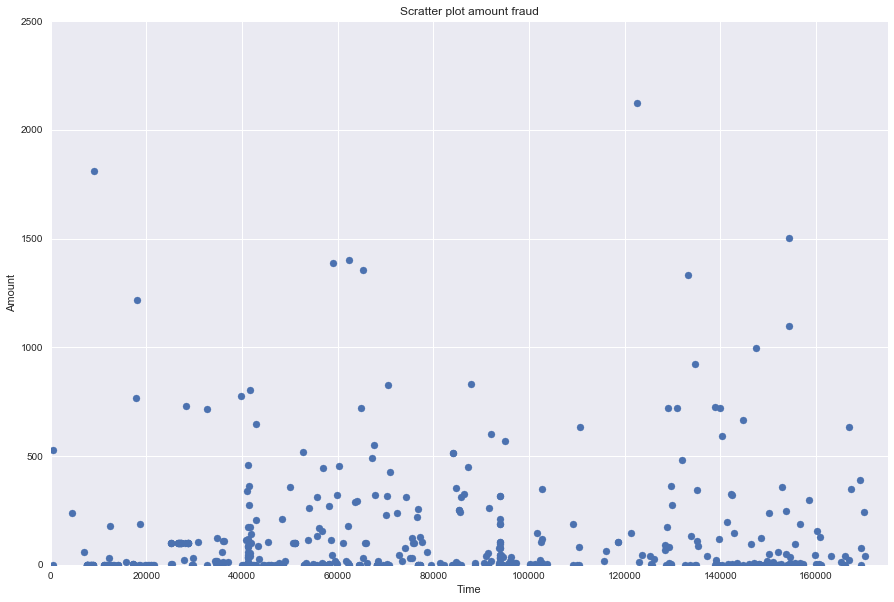

In [3]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [4]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only '+ str(nb_big_fraud) + ' frauds where the amount was bigger than 1000 over ' + str(df_fraud.shape[0]) + ' frauds')

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


In [5]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('There are only '+ str(number_fraud) + ' frauds in the original dataset, even though there are ' + str(number_no_fraud) +' no frauds in the dataset.')

There are only 492 frauds in the original dataset, even though there are 284315 no frauds in the dataset.


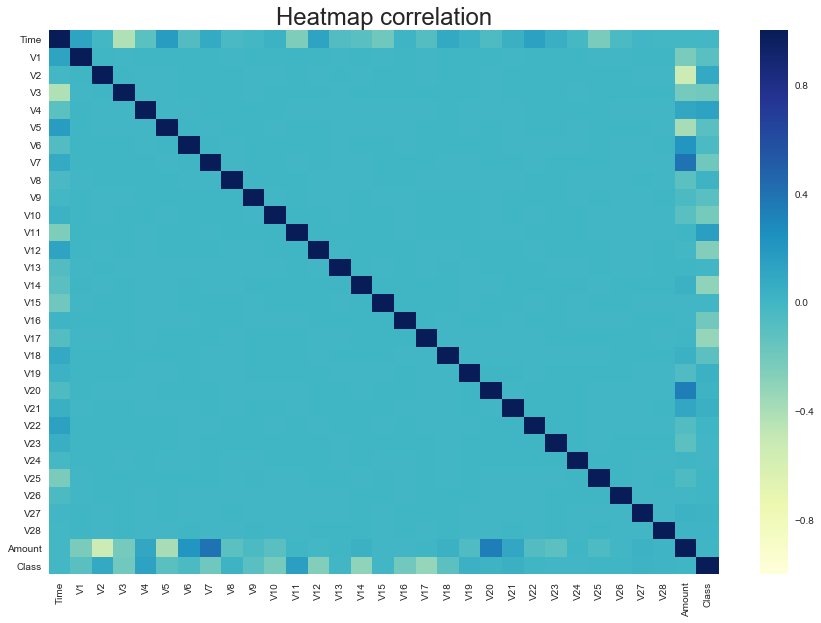

In [6]:
df_corr = df.corr() # Calculation of the correlation coefficients in pairs, with the default method:
                    # Pearson, Standard Correlation Coefficient

plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [7]:
rank = df_corr['Class'] # Retrieving the correlation coefficients per feature in relation to the feature class
df_rank = pd.DataFrame(rank) 
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False) # Ranking the absolute values of the coefficients
                                                                  # in descending order
df_rank.dropna(inplace=True) # Removing Missing Data (not a number)

#df_rank

In [8]:
# We seperate ours data in two groups : a train dataset and a test dataset

# First we build our train dataset
df_train_all = df[0:210000] # We cut in two the original dataset
df_train_1 = df_train_all[df_train_all['Class'] == 1] # We seperate the data which are the frauds and the no frauds
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('In this dataset, we have ' + str(len(df_train_1)) +" frauds so we need to take a similar number of non-fraud")

# df_sample=df_train_0.sample(300)
df_sample = df_train_1
df_train = df_train_0
for i in range(521):
    df_train = df_train.append(df_sample) # We gather the frauds with the no frauds. 
df_train = df_train.sample(frac=1) # Then we mix our dataset

In this dataset, we have 394 frauds so we need to take a similar number of non-fraud


In [9]:
X_train = df_train.drop(['Time', 'Class'],axis=1) # We drop the features Time (useless), and the Class (label)
y_train = df_train['Class'] # We create our label
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [10]:
print(X_train.shape, y_train.shape)

(414880, 29) (414880,)


In [11]:
############################## with all the test dataset to see if the model learn correctly ##################
df_test_all = df[210000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [12]:
print(X_test_all.shape, y_test_all.shape)

(74807, 29) (74807,)


In [13]:
class_names=np.array(['0','1']) # Binary label, Class = 1 (fraud) and Class = 0 (no fraud)

In [14]:
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Model SVM using Sequential Minimal Optimization

In [15]:
import numpy as np
from random import choice
import sys
# from scipy.sparse import csr_matrix, lil_matrix, save_npz, load_npz
from sklearn.metrics import classification_report, precision_recall_fscore_support, fbeta_score

In [20]:
class SVM_SMO():
    def __init__(self, max_iter=100, kernel_type='gaussian', C=1.0, epsilon=0.001):
        self.kernels = {
            'gaussian': self.kernel_gaussian
        }
        self.max_iter = max_iter
        self.kernel_type = kernel_type
        self.C = C
        self.epsilon = epsilon

    def fit(self, X_train, Y_train, X_test, Y_test, alpha, ids):
        # init
        num_samples, num_features = X_train.shape[0], X_train.shape[1] # num_samples = minibatch_size
        # num_samples, num_features = X_train.shape
        # alpha = self.C * np.random.rand(num_samples)
        kernel = self.kernels[self.kernel_type]
        # alpha_prev = np.copy(alpha)
        alpha_curr = alpha[ids]
        for j in range(0, num_samples):
            i = choice([i for i in range(0, num_samples) if i not in [j]])
            x_i, x_j, y_i, y_j = X_train[i,:].flatten(), X_train[j,:].flatten(), Y_train[i], Y_train[j]
            k_ij = kernel(x_i, x_i) + kernel(x_j, x_j) - 2*kernel(x_i, x_j)
            if k_ij == 0:
                continue

            alpha_prime_j, alpha_prime_i = alpha_curr[j], alpha_curr[i]
            (L, H) = self.compute_low_high(self.C, alpha_prime_j, alpha_prime_i, y_j, y_i)

            # Compute E_i, E_j
            error_i = self.error(x_i, y_i, X_train, Y_train, alpha, ids)
            error_j = self.error(x_j, y_j, X_train, Y_train, alpha, ids)

            # Set new alpha values
            alpha_curr[j] = alpha_prime_j + float(y_j * (error_i - error_j)) / k_ij
            alpha_curr[i] = max(alpha_curr[j], L)
            alpha_curr[j] = min(alpha_curr[j], H)

            alpha_curr[i] = alpha_prime_i + y_i*y_j*(alpha_prime_j - alpha_curr[j])
            
            alpha[ids] = alpha_curr
            
        return alpha


#         while True:
#             count = 1
#             print('----Iter ', count)
#             alpha_prev = np.copy(alpha)
#             for j in range(0, num_samples):
#                 i = choice([i for i in range(0, num_samples) if i not in [j]])
#                 x_i, x_j, y_i, y_j = X_train[i,:].flatten(), X_train[j,:].flatten(), Y_train[i], Y_train[j]
#                 k_ij = kernel(x_i, x_i) + kernel(x_j, x_j) - 2*kernel(x_i, x_j)
#                 if k_ij == 0:
#                     continue

#                 alpha_prime_j, alpha_prime_i = alpha[j], alpha[i]
#                 (L, H) = self.compute_low_high(self.C, alpha_prime_j, alpha_prime_i, y_j, y_i)

#                 # Compute E_i, E_j
#                 error_i = self.error(x_i, y_i, X_train, Y_train, alpha)
#                 error_j = self.error(x_j, y_j, X_train, Y_train, alpha)

#                 # Set new alpha values
#                 alpha[j] = alpha_prime_j + float(y_j * (error_i - error_j)) / k_ij
#                 alpha[i] = max(alpha[j], L)
#                 alpha[j] = min(alpha[j], H)

#                 alpha[i] = alpha_prime_i + y_i*y_j*(alpha_prime_j - alpha[j])

# #             if count % 1 == 0:
# #                 self.evaluate(X_train, Y_train, X_test, Y_test, alpha)
#             # Check convergence
#             diff = np.linalg.norm(alpha-alpha_prev)
#             if diff < self.epsilon:
#                 break
#             if count >= self.max_iter:
#                 print('Iteration number exceeded the max of %d iterations' % (self.max_iter))

        # Get support vectors
#         alpha_id0 = np.where(alpha > 1e-5)[0]
#         support_vectors = X_train[alpha_id0, :]

    def compute_score(self, x, X_train, Y_train, alpha, ids):
        alpha_id0 = np.where(alpha[ids] > 1e-5)[0]
        alpha_idc = np.where((alpha[ids] > 1e-5) & (alpha[ids] < .999*self.C))[0]
        
        score = np.sum(self.kernel_gaussian(X_train[alpha_id0], x)*alpha[alpha_id0]*Y_train[alpha_id0])
        intercept = np.sum(Y_train[alpha_idc])
        for idc in alpha_idc:
            intercept -= np.sum(self.kernel_gaussian(X_train[alpha_id0], X_train[idc].flatten())*alpha[alpha_id0]*Y_train[alpha_id0])
        
#         score = 0
#         for id0 in alpha_id0:
#             score += self.kernel_gaussian(X_train[id0].flatten(), x)*alpha[id0]*Y_train[id0]
#         intercept = 0
#         for idc in alpha_idc:
#                 intercept += Y_train[idc]
#                 for id0 in alpha_id0:
#                     intercept -= self.kernel_gaussian(X_train[id0].flatten(), X_train[idc].flatten())*alpha[id0]*Y_train[id0]

        return score + intercept / len(alpha_idc)

    # Error prediction
    def error(self, x, y, X_train, Y_train, alpha, ids):
        predict = self.compute_score(x, X_train, Y_train, alpha, ids)
        return 2*(int(predict > 0)) - 1 - y

    def compute_low_high(self, C, alpha_prime_j, alpha_prime_i, y_j, y_i):
        if (y_i != y_j):
            return (max(0, alpha_prime_j - alpha_prime_i), min(C, C - alpha_prime_i + alpha_prime_j))
        else:
            return (max(0, alpha_prime_i + alpha_prime_j - C), min(C, alpha_prime_i + alpha_prime_j))

    def kernel_gaussian(self, x1, x2, sigma=1):
        return np.exp(-np.linalg.norm(x1 - x2) / (2*sigma**2))
    
    def evaluate(self, X_train, Y_train, X_test, Y_test, alpha):
        test_size = X_test.shape[0]
        Y_pred = np.zeros(test_size)
        for i in range(test_size):
            x, y_true = X_test[i].flatten(), Y_test[i]
            score = self.compute_score(x, X_train, Y_train, alpha, list(np.arange(X_train.shape[0])))
            if score >= 0:
                Y_pred[i] = 1
            print('.......................', i)
        print(classification_report(Y_test, Y_pred, target_names=['non-fraud', 'fraud']))
        cm = confusion_matrix(Y_test, Y_pred)
        plot_confusion_matrix(cm,class_names)
        print('Our criterion give a result of ' 
          + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))
        print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
        print('So, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
        print("The accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))
        print('--------------')

In [21]:
# #learning batch
# svm = SVM_SMO(C=1.0)
# svm.fit(X_train, y_train, X_test_all, y_test_all)

In [22]:
# learn minibatch
def learn_model(X_train, Y_train, X_test, Y_test, minibatch_size, num_epochs, C=1.0):
    num_samples = X_train.shape[0]
    num_features = X_train.shape[1]

    Y_train = 2*Y_train-1  # convert labels to 1, -1 using for training
    
    alpha0 = C * np.random.rand(num_samples)
    alpha = [alpha0]

    num_minibatch = int(np.ceil(num_samples / float(minibatch_size)))
    svm = SVM_SMO(C=1.0)

    for epoch in range(num_epochs):
        print('Epoch ', epoch+1)
        mix_ids = np.random.permutation(num_samples)
        for it in range(num_minibatch):
            print('--Minibatch ', it+1)
            ids = mix_ids[minibatch_size*it:min(minibatch_size*(it+1), num_samples)]
            X_batch = X_train[ids]
            Y_batch = Y_train[ids]
            alpha_new = svm.fit(X_batch, Y_batch, X_test, Y_test, alpha[-1], ids)
            alpha.append(alpha_new)
            print('----Evaluating...')
            svm.evaluate(X_train, Y_train, X_test, Y_test, alpha[-1])

In [23]:
learn_model(X_train, y_train, X_test_all, y_test_all, minibatch_size=10000, num_epochs=20, C=1.0)

Epoch  1
--Minibatch  1
done score
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang intercept
dang 

KeyboardInterrupt: 